# TASK : On Databricks, read the files from the Azure storage and make a copy of it into DBFS.

In [0]:
from pyspark.sql.functions import coalesce

In [0]:
# Mount Azure Blob Storage to DBFS

In [0]:
# Unmount the directory
#dbutils.fs.unmount("/mnt/blobstorage")
dbutils.fs.mount(
    source="wasbs://bigdata2@bigdata2.blob.core.windows.net",
    mount_point="/mnt/blobstorage",
    extra_configs={
        "fs.azure.account.key.bigdata2.blob.core.windows.net": "llAut/56YeRPzBVjbAmuYu9Q/M/sJ3Akx1V7Klyr8f9Fb1dRZPmlru943KeLCZJShJbY1keLslv8+AStuts+tA=="
    },
)

Out[1]: True

In [0]:
# List files in the mounted Azure Blob Storage
display(dbutils.fs.ls("/mnt/blobstorage"))

path name size modificationTime dbfs:/mnt/blobstorage/combined_taxi_data.parquet/ combined_taxi_data.parquet/ 0 1728846996000 dbfs:/mnt/blobstorage/green_taxi_2015.csv green_taxi_2015.csv 2179116866 1728809980000 dbfs:/mnt/blobstorage/green_taxi_2015.parquet green_taxi_2015.parquet 404556105 1728010224000 dbfs:/mnt/blobstorage/green_taxi_2016.parquet green_taxi_2016.parquet 346731598 1728010064000 dbfs:/mnt/blobstorage/green_taxi_2017.parquet green_taxi_2017.parquet 251504885 1728009741000 dbfs:/mnt/blobstorage/green_taxi_2018.parquet green_taxi_2018.parquet 193874396 1728009657000 dbfs:/mnt/blobstorage/green_taxi_2019.parquet green_taxi_2019.parquet 142163406 1728009532000 dbfs:/mnt/blobstorage/green_taxi_2020.parquet green_taxi_2020.parquet 37076741 1728009689000 dbfs:/mnt/blobstorage/green_taxi_2021.parquet green_taxi_2021.parquet 23479865 1728009776000 dbfs:/mnt/blobstorage/green_taxi_2022.parquet green_taxi_2022.parquet 20085692 1728009790000 dbfs:/mnt/blobstorage/location_data.parquet/ location_data.parquet/ 0 1728834473000 dbfs:/mnt/blobstorage/yellow_taxi_2015.parquet yellow_taxi_2015.parquet 2896588873 1728023518000 dbfs:/mnt/blobstorage/yellow_taxi_2016.parquet yellow_taxi_2016.parquet 2616839324 1728026712000 dbfs:/mnt/blobstorage/yellow_taxi_2017.parquet yellow_taxi_2017.parquet 2072273391 1728043331000 dbfs:/mnt/blobstorage/yellow_taxi_2018.parquet yellow_taxi_2018.parquet 2098068908 1728043345000 dbfs:/mnt/blobstorage/yellow_taxi_2019.parquet yellow_taxi_2019.parquet 1788371641 1728048288000 dbfs:/mnt/blobstorage/yellow_taxi_2020.parquet yellow_taxi_2020.parquet 533759081 1728047371000 dbfs:/mnt/blobstorage/yellow_taxi_2021.parquet yellow_taxi_2021.parquet 678942509 1728047563000 dbfs:/mnt/blobstorage/yellow_taxi_2022.parquet yellow_taxi_2022.parquet 875304042 1728048878000

In [0]:
# Copy files from Azure Blob Storage mounted at /mnt/blobstorage to DBFS
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2015.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2015.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2016.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2016.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2017.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2017.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2018.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2018.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2019.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2019.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2020.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2020.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2021.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2021.parquet")
dbutils.fs.cp("/mnt/blobstorage/green_taxi_2022.parquet", "dbfs:/mnt/dbfs-storage/green_taxi_2022.parquet")

dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2015.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2015.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2016.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2016.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2017.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2017.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2018.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2018.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2019.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2019.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2020.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2020.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2021.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2021.parquet")
dbutils.fs.cp("/mnt/blobstorage/yellow_taxi_2022.parquet", "dbfs:/mnt/dbfs-storage/yellow_taxi_2022.parquet")


Out[3]: True

# TASK: Count the total numbers of rows for each taxi colour (yellow and green) by reading the files stored on DBFS:
Green taxi: 66,200,401
Yellow taxi: 663,055,251


In [0]:
# Load and count rows for green taxi data (2015-2022)
green_taxi_files = [
    "dbfs:/mnt/dbfs-storage/green_taxi_2015.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2016.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2017.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2018.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2019.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2020.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2021.parquet",
    "dbfs:/mnt/dbfs-storage/green_taxi_2022.parquet"
]

total_green_rows = 0

for file in green_taxi_files:
    df = spark.read.parquet(file)
    total_green_rows += df.count()

print(f"Total number of rows for Green Taxi data: {total_green_rows}")


Total number of rows for Green Taxi data: 66200401


In [0]:
# Load and count rows for yellow taxi data (2015-2022)
yellow_taxi_files = [
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2015.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2016.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2017.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2018.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2019.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2020.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2021.parquet",
    "dbfs:/mnt/dbfs-storage/yellow_taxi_2022.parquet"
]

total_yellow_rows = 0

for file in yellow_taxi_files:
    df = spark.read.parquet(file)
    total_yellow_rows += df.count()

print(f"Total number of rows for Yellow Taxi data: {total_yellow_rows}")


Total number of rows for Yellow Taxi data: 663055251


# CREATING A DATAFRAME 

In [0]:
# Load and combine green taxi files into one DataFrame
green_taxi_df = None

for file in green_taxi_files:
    df = spark.read.parquet(file)
    if green_taxi_df is None:
        green_taxi_df = df
    else:
        green_taxi_df = green_taxi_df.union(df)

# Show some rows from the combined green taxi DataFrame
green_taxi_df.show(5)

# Count the total number of rows in the green taxi DataFrame
green_total_rows = green_taxi_df.count()
print(f"Total number of rows in the Green Taxi DataFrame: {green_total_rows}")


+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|store_and_fwd_flag|RatecodeID|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|ehail_fee|improvement_surcharge|total_amount|payment_type|trip_type|congestion_surcharge|
+--------+--------------------+---------------------+------------------+----------+------------+------------+---------------+-------------+-----------+-----+-------+----------+------------+---------+---------------------+------------+------------+---------+--------------------+
|       2| 2015-05-01 00:24:18|  2015-05-01 00:24:39|                 N|       1.0|         146|         146|            1.0|          0.0|        2.5|  0.5|    0.

In [0]:
# Load and combine yellow taxi files into one DataFrame
yellow_taxi_df = None

for file in yellow_taxi_files:
    df = spark.read.parquet(file)
    if yellow_taxi_df is None:
        yellow_taxi_df = df
    else:
        yellow_taxi_df = yellow_taxi_df.union(df)

# Show some rows from the combined yellow taxi DataFrame
yellow_taxi_df.show(5)

# Count the total number of rows in the yellow taxi DataFrame
yellow_total_rows = yellow_taxi_df.count()
print(f"Total number of rows in the Yellow Taxi DataFrame: {yellow_total_rows}")


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       1| 2015-01-01 00:11:33|  2015-01-01 00:16:48|            1.0|          1.0|       1.0|                 N|          41|         166|           1|        5.7|  0.5|    0.5|       1.

 #  DATA CLEANING AND TASK :
 Explore the dataset and perform any required data cleaning to remove unrealistic trips (You can use pyspark or sparksql) such as:
Trips finishing before the starting time
Trips where the pickup/dropoff datetime is outside of the range
Trips with negative speed
Trips with very high speed (look for NYC and outside of NYC speed limit )
Trips that are travelling too short or too long (duration wise)
Trips that are travelling too short or too long (distance wise)
Any other logic you think is important


SINCE THE DATA IS SO BIG ITS TAKING LOT OF TIME TO PROCESS SINCE WE DROPPING ALL THE COLUMN THAT IS NOT REQUIRD FOR THIS ASSIGNMENT

# STEP 4 What was the percentage of trips where drivers received tips?

In [0]:
# Install gdown in Databricks
%pip install gdown


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import gdown

# The actual Google Drive ID from the provided link
file_id = '1zrPGsS30qIIFSXgWR2iH0VCW4uEFqAst'

# Google Drive download URL pattern
gdrive_url = f'https://drive.google.com/uc?id={file_id}'

output_local_path = '/tmp/taxi_zone_lookup.csv'

# Download the file to the local path
gdown.download(gdrive_url, output_local_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1zrPGsS30qIIFSXgWR2iH0VCW4uEFqAst
To: /tmp/taxi_zone_lookup.csv
100%|██████████| 12.3k/12.3k [00:00<00:00, 12.9MB/s]


Out[3]: '/tmp/taxi_zone_lookup.csv'

# STEP 5 Convert the “Green” 2015 parquet into a csv file and send it to your Azure Blob Storage. Compare the size of the parquet file against its csv version then explain why parquet format makes more sense than csv.


In [0]:
dbutils.fs.rm("/mnt/green_2015_csv", recurse=True)

Out[3]: False

In [0]:
# Load the Green taxi 2015 parquet file
green_2015_df = spark.read.parquet("dbfs:/mnt/dbfs-storage/green_taxi_2015.parquet")

# Save the Green taxi 2015 data as CSV into Azure Blob Storage
green_2015_df.write.format("csv").option("header", "true").save(f"/mnt/green_2015_csv")

In [0]:
# Get the size of the parquet file in MB
parquet_size = dbutils.fs.ls("dbfs:/mnt/dbfs-storage/green_taxi_2015.parquet")[0].size
parquet_size_mb = parquet_size / (1024 * 1024)  # Convert bytes to MB
print(f"Parquet file size: {parquet_size_mb:.2f} MB")

# Get the total size of all CSV part files in MB
csv_files = dbutils.fs.ls(f"/mnt/green_2015_csv")
csv_size = sum([file.size for file in csv_files if file.name.endswith(".csv")])
csv_size_mb = csv_size / (1024 * 1024)  # Convert bytes to MB
print(f"CSV file size: {csv_size_mb:.2f} MB")


Parquet file size: 385.81 MB
CSV file size: 2078.17 MB


Parquet is a columnar storage format that allows for much more efficient compression than row-based formats like CSV. Since data is stored column-by-column, Parquet can apply more effective compression algorithms, resulting in smaller file sizes.

Since Parquet is columnar, it’s optimized for reading specific columns without having to read the entire dataset. For example, if you need only a few columns for analysis, Parquet allows you to read just those columns, reducing the amount of I/O and speeding up processing.

In [0]:
# Load the CSV file from DBFS into a Spark DataFrame
location_df = spark.read.csv("/FileStore/taxi_zone_lookup.csv", header=True, inferSchema=True)

# Show the first few rows of the location data
location_df.show(5)


+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows



# Code to Drop Unwanted Columns

WE DROPPING ALL THE UNWANTED COLUMN. SO WE CAN PROCESS THE DATA FASTER 

In [0]:
# Drop unwanted columns from Green Taxi dataset
green_taxi_sample_cleaned = green_taxi_df.drop("store_and_fwd_flag", "RatecodeID", "mta_tax", "ehail_fee", "congestion_surcharge")

# Drop unwanted columns from Yellow Taxi dataset
yellow_taxi_sample_cleaned = yellow_taxi_df.drop("store_and_fwd_flag", "RatecodeID", "mta_tax", "ehail_fee", "congestion_surcharge", "airport_fee")

# Show the remaining columns
green_taxi_sample_cleaned.printSchema()
yellow_taxi_sample_cleaned.printSchema()


root
 |-- VendorID: long (nullable = true)
 |-- lpep_pickup_datetime: timestamp (nullable = true)
 |-- lpep_dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- trip_type: double (nullable = true)

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable

# DATA CLEANING

In [0]:
# Step 1: Fill null values with "NA" in both green and yellow taxi samples
green_taxi_sample_cleaned = green_taxi_sample_cleaned.na.fill("NA")
yellow_taxi_sample_cleaned = yellow_taxi_sample_cleaned.na.fill("NA")

In [0]:
# Step 2: Remove duplicate rows from both datasets
green_taxi_sample_cleaned = green_taxi_sample_cleaned.dropDuplicates()
yellow_taxi_sample_cleaned = yellow_taxi_sample_cleaned.dropDuplicates()

Due to my hardware limitation. i am gonna use only 75% of the data

In [0]:
# Step 3: Reduce the dataset by sampling 75% of the data
green_taxi_sample_reduced = green_taxi_sample_cleaned.sample(fraction=0.60, seed=42)
yellow_taxi_sample_reduced = yellow_taxi_sample_cleaned.sample(fraction=0.60, seed=42)



In [0]:
# Show the first few rows of the cleaned and reduced green taxi dataset
green_taxi_sample_reduced.show(5)

# Show the first few rows of the cleaned and reduced yellow taxi dataset
yellow_taxi_sample_reduced.show(5)

# DUE TO THE LIMITED CLUSTER TIME, WE GONNA UPLOAD EVERY REQUIRED FILES INTO DBMS. SO WE CAN USE IT WHEN IT IS REQUIRED 

In [0]:
# Save the green taxi sample reduced dataset to DBFS in Parquet format
green_taxi_sample_reduced.write.mode("overwrite").parquet("dbfs:/mnt/dbfs-storage/green_taxi_sample_reduced.parquet")


In [0]:
# Save the yellow taxi sample reduced dataset to FileStore in Parquet format
yellow_taxi_sample_reduced.write.mode("overwrite").parquet("dbfs:/FileStore/yellow_taxi_sample_reduced.parquet")


In [0]:
# Load the green taxi sample reduced dataset from DBFS
green_taxi_sample_reduced = spark.read.parquet("dbfs:/mnt/dbfs-storage/green_taxi_sample_reduced.parquet")
# Load the yellow taxi sample reduced dataset from DBFS
yellow_taxi_sample_reduced = spark.read.parquet("dbfs:/FileStore/yellow_taxi_sample_reduced.parquet")


#  STEP 6 TASK: Explore the dataset and perform any required data cleaning to remove unrealistic trips (You can use pyspark or sparksql) such as:
Trips finishing before the starting time
Trips where the pickup/dropoff datetime is outside of the range
Trips with negative speed
Trips with very high speed (look for NYC and outside of NYC speed limit )
Trips that are travelling too short or too long (duration wise)
Trips that are travelling too short or too long (distance wise)
Any other logic you think is important


In [0]:
from pyspark.sql.functions import col, unix_timestamp

# Define the valid datetime range
start_date = "2015-01-01"
end_date = "2022-12-31"


In [0]:
# Step 1: Filter Green Taxi Sample

In [0]:
# 1. Filter out trips where dropoff is before or equal to pickup time
green_taxi_cleaned = green_taxi_sample_reduced.filter(
    green_taxi_sample_reduced.lpep_dropoff_datetime > green_taxi_sample_reduced.lpep_pickup_datetime
)

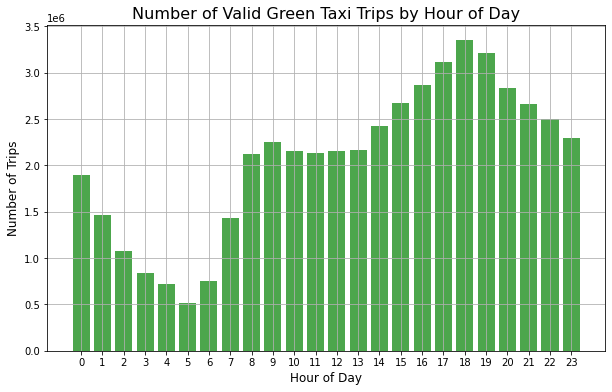

In [0]:
from pyspark.sql.functions import hour
import matplotlib.pyplot as plt

# Extract hour from pickup time for visualization
green_taxi_cleaned = green_taxi_cleaned.withColumn("pickup_hour", hour("lpep_pickup_datetime"))

# Group by hour and count the number of trips
trip_count_by_hour = green_taxi_cleaned.groupBy("pickup_hour").count().orderBy("pickup_hour").collect()

# Convert the result to lists for plotting
hours = [row["pickup_hour"] for row in trip_count_by_hour]
trip_counts = [row["count"] for row in trip_count_by_hour]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(hours, trip_counts, color="green", alpha=0.7)
plt.title('Number of Valid Green Taxi Trips by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(hours)
plt.grid(True)
plt.show()


In [0]:
# 2. Filter trips with pickup/dropoff datetime outside the valid date range
green_taxi_cleaned = green_taxi_cleaned.filter(
    (col("lpep_pickup_datetime") >= start_date) & 
    (col("lpep_dropoff_datetime") <= end_date)
)

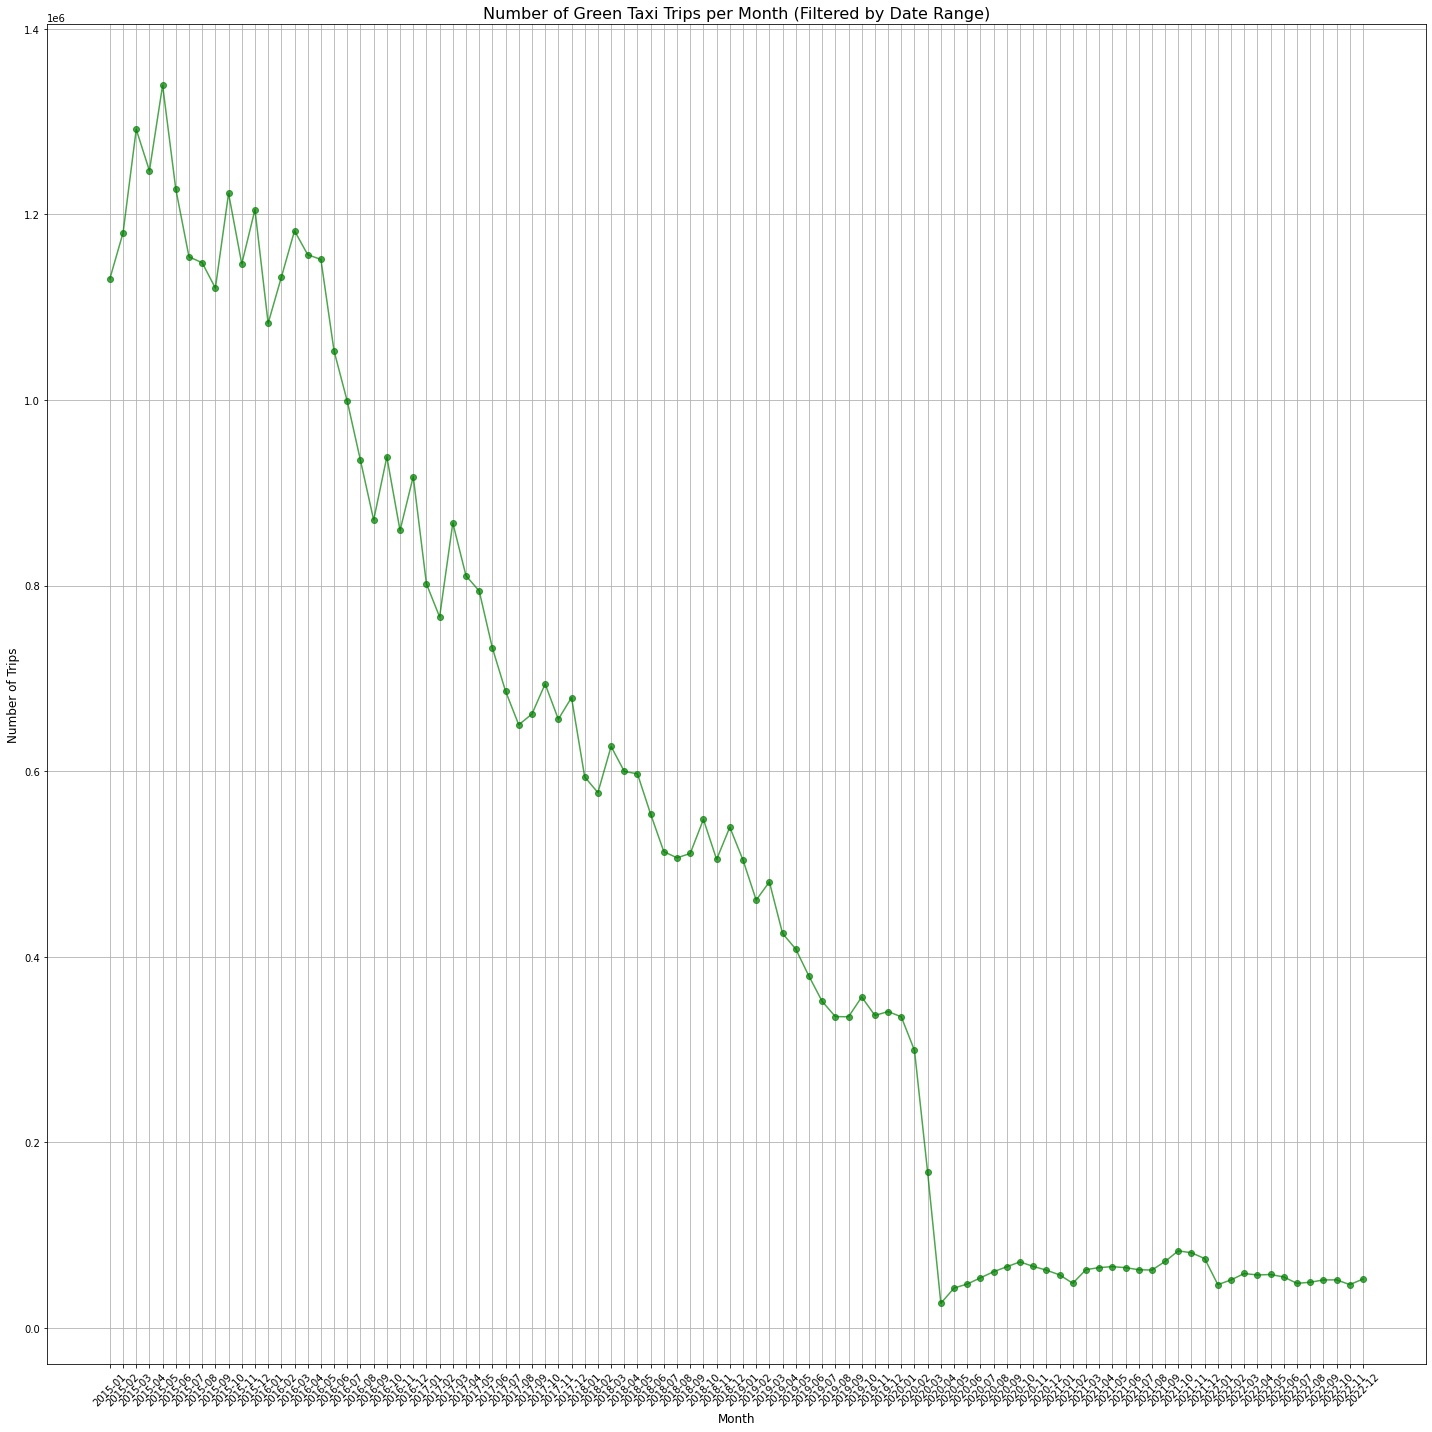

In [0]:
from pyspark.sql.functions import date_format
# Extract year and month from pickup datetime for aggregation
green_taxi_cleaned = green_taxi_cleaned.withColumn("pickup_month", date_format(col("lpep_pickup_datetime"), "yyyy-MM"))

# Group by the month and count the number of trips
trip_count_by_month = green_taxi_cleaned.groupBy("pickup_month").count().orderBy("pickup_month").collect()

# Convert the result to lists for plotting
months = [row["pickup_month"] for row in trip_count_by_month]
trip_counts = [row["count"] for row in trip_count_by_month]

# Plot the line chart
plt.figure(figsize=(20, 20))
plt.plot(months, trip_counts, marker="o", color="green", linestyle="-", alpha=0.7)
plt.title('Number of Green Taxi Trips per Month (Filtered by Date Range)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [0]:
# 3. Calculate trip duration in hours
green_taxi_cleaned = green_taxi_cleaned.withColumn("trip_duration_hours", 
    (unix_timestamp("lpep_dropoff_datetime") - unix_timestamp("lpep_pickup_datetime")) / 3600
)


In [0]:
import matplotlib.pyplot as plt


JUST USING SMALL PORTION OF DATA FOR VISUALIZATION

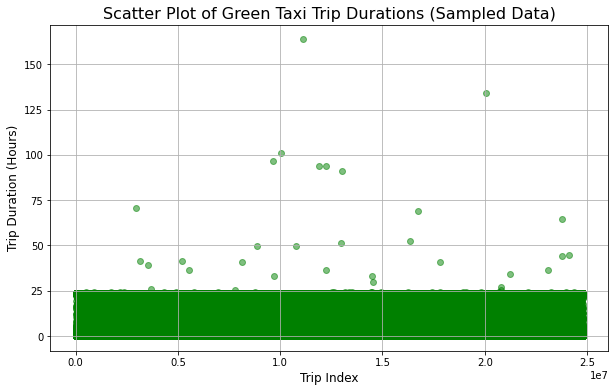

In [0]:
trip_durations_sample = green_taxi_cleaned.select("trip_duration_hours").sample(fraction=0.50, seed=42).rdd.flatMap(lambda x: x).collect()

# Create a scatter plot for the sampled trip durations
plt.figure(figsize=(10, 6))
plt.scatter(range(len(trip_durations_sample)), trip_durations_sample, alpha=0.5, color="green")

# Add title and labels
plt.title('Scatter Plot of Green Taxi Trip Durations ', fontsize=16)
plt.xlabel('Trip Index', fontsize=12)
plt.ylabel('Trip Duration (Hours)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

In [0]:
# 4. Calculate speed (miles per hour)
# Filter out rows where trip_duration_hours is zero or negative to avoid division by zero
green_taxi_cleaned = green_taxi_cleaned.filter(col("trip_duration_hours") > 0)

# Recalculate speed in miles per hour
green_taxi_cleaned = green_taxi_cleaned.withColumn("speed_mph", 
    col("trip_distance") / col("trip_duration_hours")
)

In [0]:
# 5. Filter out trips with negative or zero speed, and trips with very high speed 
green_taxi_cleaned = green_taxi_cleaned.filter((col("speed_mph") > 0) & (col("speed_mph") <= 80))

In [0]:
# 6. Filter out trips with unrealistic durations 
green_taxi_cleaned = green_taxi_cleaned.filter((col("trip_duration_hours") >= 1/60) & (col("trip_duration_hours") <= 4))


In [0]:
# Sample a small portion of the filtered data for visualization 
trip_durations_filtered_sample = green_taxi_cleaned.select("trip_duration_hours").sample(fraction=0.50, seed=42).rdd.flatMap(lambda x: x).collect()

# Plot a histogram of the filtered trip durations
plt.figure(figsize=(10, 6))
plt.hist(trip_durations_filtered_sample, bins=50, color="green", alpha=0.7)
plt.title('Distribution of Filtered Green Taxi Trip Durations ', fontsize=16)
plt.xlabel('Trip Duration (Hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [0]:
# 7. Filter out trips with unrealistic distances
green_taxi_cleaned = green_taxi_cleaned.filter((col("trip_distance") >= 0.1) & (col("trip_distance") <= 100))

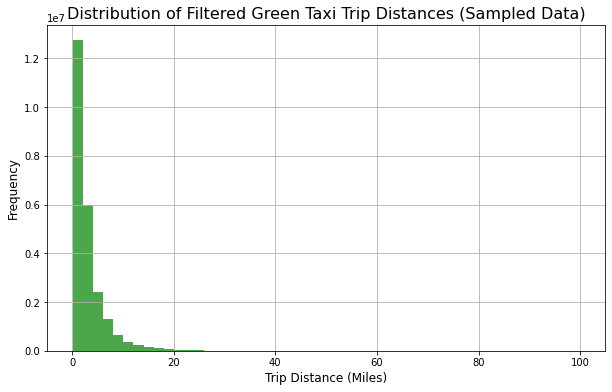

In [0]:
trip_distances_filtered_sample = green_taxi_cleaned.select("trip_distance").sample(fraction=0.50, seed=42).rdd.flatMap(lambda x: x).collect()

# Plot a histogram of the filtered trip distances
plt.figure(figsize=(10, 6))
plt.hist(trip_distances_filtered_sample, bins=50, color="green", alpha=0.7)
plt.title('Distribution of Filtered Green Taxi Trip Distances ', fontsize=16)
plt.xlabel('Trip Distance (Miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [0]:
# Show first few rows of the cleaned Green Taxi DataFrame
green_taxi_cleaned.show(5)


+--------+--------------------+---------------------+------------+------------+---------------+-------------+-----------+-----+----------+------------+---------------------+------------+------------+---------+-----------+-------------------+------------------+
|VendorID|lpep_pickup_datetime|lpep_dropoff_datetime|PULocationID|DOLocationID|passenger_count|trip_distance|fare_amount|extra|tip_amount|tolls_amount|improvement_surcharge|total_amount|payment_type|trip_type|pickup_hour|trip_duration_hours|         speed_mph|
+--------+--------------------+---------------------+------------+------------+---------------+-------------+-----------+-----+----------+------------+---------------------+------------+------------+---------+-----------+-------------------+------------------+
|       2| 2015-05-01 00:18:59|  2015-05-01 00:28:06|          25|          65|            1.0|         1.06|        7.5|  0.5|      2.64|         0.0|                  0.3|       11.44|         1.0|      1.0|        

YELLOW TAXI

I DONT WANNA SPEND TIME ON VISUALIZATION. SO I AM GONNA USE MINIMAL AMOUNT OF DATA

In [0]:
# 1. Filter out trips where dropoff is before or equal to pickup time
yellow_taxi_cleaned = yellow_taxi_sample_reduced.filter(
    yellow_taxi_sample_reduced.tpep_dropoff_datetime > yellow_taxi_sample_reduced.tpep_pickup_datetime
)

In [0]:
# 2. Filter trips with pickup/dropoff datetime outside the valid date range
yellow_taxi_cleaned = yellow_taxi_cleaned.filter(
    (col("tpep_pickup_datetime") >= start_date) & 
    (col("tpep_dropoff_datetime") <= end_date)
)

In [0]:
# 3. Calculate trip duration in hours
yellow_taxi_cleaned = yellow_taxi_cleaned.withColumn("trip_duration_hours", 
    (unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")) / 3600
)

In [0]:
# 4. Calculate speed (miles per hour)
yellow_taxi_cleaned = yellow_taxi_cleaned.withColumn("speed_mph", 
    col("trip_distance") / col("trip_duration_hours")
)


In [0]:
# 5. Filter out trips with negative or zero speed, and trips with very high speed (e.g., over 80 mph)
yellow_taxi_cleaned = yellow_taxi_cleaned.filter((col("speed_mph") > 0) & (col("speed_mph") <= 80))

In [0]:
# 6. Filter out trips with unrealistic durations (e.g., less than 1 minute or more than 4 hours)
yellow_taxi_cleaned = yellow_taxi_cleaned.filter((col("trip_duration_hours") >= 1/60) & (col("trip_duration_hours") <= 4))


In [0]:
# 7. Filter out trips with unrealistic distances (e.g., less than 0.1 miles or more than 100 miles)
yellow_taxi_cleaned = yellow_taxi_cleaned.filter((col("trip_distance") >= 0.1) & (col("trip_distance") <= 100))


In [0]:
# Show first few rows of the cleaned Yellow Taxi DataFrame
yellow_taxi_cleaned.show(5)

+--------+--------------------+---------------------+---------------+-------------+------------+------------+------------+-----------+-----+----------+------------+---------------------+------------+-------------------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|PULocationID|DOLocationID|payment_type|fare_amount|extra|tip_amount|tolls_amount|improvement_surcharge|total_amount|trip_duration_hours|         speed_mph|
+--------+--------------------+---------------------+---------------+-------------+------------+------------+------------+-----------+-----+----------+------------+---------------------+------------+-------------------+------------------+
|       2| 2019-10-08 11:33:37|  2019-10-08 12:13:05|            1.0|        20.97|         186|           1|           2|      -78.0|  0.0|       0.0|       -23.5|                 -0.3|      -101.8| 0.6577777777777778|31.880067567567565|
|       2| 2020-03-12 17:32:52|  2020-03-12 

# STEP 7 Combine the yellow and green taxi dataset together (their schema are not exactly the same)

In [0]:
# Find the common columns in both yellow and green datasets
common_columns = list(set(yellow_taxi_cleaned.columns).intersection(set(green_taxi_cleaned.columns)))

# Select only the common columns from both datasets
yellow_taxi_cleaned_common = yellow_taxi_cleaned.select(common_columns)
green_taxi_cleaned_common = green_taxi_cleaned.select(common_columns)

# Combine the two datasets using union (since they now have the same schema)
combined_taxi_data = yellow_taxi_cleaned_common.union(green_taxi_cleaned_common)

# Show the combined dataset
combined_taxi_data.show(10, truncate=False)


+---------------+-----+-------------------+------------+---------------------+------------------+------------+------------+-------------+------------+--------+----------+------------+-----------+
|passenger_count|extra|trip_duration_hours|total_amount|improvement_surcharge|speed_mph         |DOLocationID|payment_type|trip_distance|PULocationID|VendorID|tip_amount|tolls_amount|fare_amount|
+---------------+-----+-------------------+------------+---------------------+------------------+------------+------------+-------------+------------+--------+----------+------------+-----------+
|2.0            |0.5  |0.33444444444444443|16.5        |0.0                  |11.063122923588042|37          |2.0         |3.7          |188         |1       |0.0       |0.0         |15.5       |
|1.0            |0.5  |0.11277777777777778|7.8         |0.0                  |9.753694581280788 |158         |2.0         |1.1          |113         |1       |0.0       |0.0         |6.5        |
|1.0            |0.5

# COMBINING THE BOTH YELLOW AND GREEN DATAFRAME INTO A SINGLE DATAFRAME 

In [0]:
# Combine the two DataFrames
combined_taxi_data = yellow_taxi_cleaned.union(green_taxi_cleaned)

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-2428748268010494>:2
      1 # Combine the two DataFrames
----> 2 combined_taxi_data = yellow_taxi_cleaned.union(green_taxi_cleaned)

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:3646, in DataFrame.union(self, other)
   3598 def union(self, other: "DataFrame") -> "DataFrame":
   3599     """Return a new :class:`DataFrame` containing union of rows in this and another
   3600     :class:`DataFrame`.
   3601 
   (...)
   3644     +----+----+----+
   3

VIEW THE COMBINED DATA


In [0]:
# View the first 10 rows of the combined dataset
combined_taxi_data.show(10, truncate=False)

+---------------+-----+-------------------+------------+---------------------+------------------+------------+------------+-------------+------------+--------+----------+------------+-----------+
|passenger_count|extra|trip_duration_hours|total_amount|improvement_surcharge|speed_mph         |DOLocationID|payment_type|trip_distance|PULocationID|VendorID|tip_amount|tolls_amount|fare_amount|
+---------------+-----+-------------------+------------+---------------------+------------------+------------+------------+-------------+------------+--------+----------+------------+-----------+
|1.0            |0.0  |0.6577777777777778 |-101.8      |-0.3                 |31.880067567567565|1           |2.0         |20.97        |186         |2       |0.0       |-23.5       |-78.0      |
|1.0            |-1.0 |0.8988888888888888 |-124.55     |-0.3                 |23.784919653893695|1           |2.0         |21.38        |163         |2       |0.0       |-18.25      |-102.0     |
|2.0            |0.0

# STEP 8 Combine the new dataframe with the location data (there are two locations in each trip, pick up location and drop off location)


In [0]:
# Load the location data
location_df = spark.read.csv("dbfs:/FileStore/taxi_zone_lookup.csv", header=True, inferSchema=True)

# Asynchronous function to combine with pickup and dropoff location names
async def combine_with_location(taxi_data, location_data):
    # Join for the pickup location
    combined_with_pickup = taxi_data.join(location_data, taxi_data.PULocationID == location_data.LocationID, "left") \
                                    .withColumnRenamed("Borough", "Pickup_Borough") \
                                    .withColumnRenamed("Zone", "Pickup_Zone") \
                                    .drop("LocationID")

    # Join for the drop-off location
    combined_with_locations = combined_with_pickup.join(location_data, combined_with_pickup.DOLocationID == location_data.LocationID, "left") \
                                                  .withColumnRenamed("Borough", "Dropoff_Borough") \
                                                  .withColumnRenamed("Zone", "Dropoff_Zone") \
                                                  .drop("LocationID")
    return combined_with_locations

# Run the async join function and await the result
combined_taxi_with_locations = await combine_with_location(combined_taxi_data, location_df)

# Show the first few rows of the new combined dataset
combined_taxi_with_locations.select("PULocationID", "DOLocationID", "Pickup_Borough", "Dropoff_Borough").show(3)


+------------+------------+--------------+---------------+
|PULocationID|DOLocationID|Pickup_Borough|Dropoff_Borough|
+------------+------------+--------------+---------------+
|       188.0|        37.0|      Brooklyn|       Brooklyn|
|       113.0|       158.0|     Manhattan|      Manhattan|
|        43.0|       236.0|     Manhattan|      Manhattan|
+------------+------------+--------------+---------------+
only showing top 3 rows



In [0]:
location_df.head(15)

Out[133]: [Row(LocationID=1, Borough='EWR', Zone='Newark Airport', service_zone='EWR'),
 Row(LocationID=2, Borough='Queens', Zone='Jamaica Bay', service_zone='Boro Zone'),
 Row(LocationID=3, Borough='Bronx', Zone='Allerton/Pelham Gardens', service_zone='Boro Zone'),
 Row(LocationID=4, Borough='Manhattan', Zone='Alphabet City', service_zone='Yellow Zone'),
 Row(LocationID=5, Borough='Staten Island', Zone='Arden Heights', service_zone='Boro Zone'),
 Row(LocationID=6, Borough='Staten Island', Zone='Arrochar/Fort Wadsworth', service_zone='Boro Zone'),
 Row(LocationID=7, Borough='Queens', Zone='Astoria', service_zone='Boro Zone'),
 Row(LocationID=8, Borough='Queens', Zone='Astoria Park', service_zone='Boro Zone'),
 Row(LocationID=9, Borough='Queens', Zone='Auburndale', service_zone='Boro Zone'),
 Row(LocationID=10, Borough='Queens', Zone='Baisley Park', service_zone='Boro Zone'),
 Row(LocationID=11, Borough='Brooklyn', Zone='Bath Beach', service_zone='Boro Zone'),
 Row(LocationID=12, Boroug

# STEP 9 Export the combined data into a parquet file in DBFS and then load it as a table or view.


In [0]:
# Drop the `service_zone` column from one of the DataFrames if it exists
combined_taxi_cleaned = combined_taxi_with_locations.drop("service_zone")

# Now save the combined dataset to Parquet
combined_taxi_cleaned.write.mode("overwrite").parquet("dbfs:/FileStore/combined_taxi_data.parquet")


In [0]:
# Verify the new schema of the combined dataset
combined_taxi_with_locations.printSchema()


root
 |-- DOLocationID: long (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- VendorID: long (nullable = true)
 |-- extra: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- lpep_dropoff_datetime: string (nullable = true)
 |-- lpep_pickup_datetime: string (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- speed_mph: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- trip_duration_hours: double (nullable = true)
 |-- trip_type: string (nullable = true)
 |-- Pickup_Borough: string (nullable = true)
 |-- Pickup_Zone: string (nullable = true)
 |-- service_zone: string (nullable = true

# LOADING THE DATAFRAME AS A TABLE INTO A META. SO WE CAN USE THE TABLE IN THE UPCOMING TASK

In [0]:
# Save the DataFrame as a permanent table in the metastore
combined_taxi_cleaned.write.mode("overwrite").saveAsTable("combined_taxi_table")

# Verify that the table is loaded by running a query
spark.sql("SELECT * FROM combined_taxi_table LIMIT 10").show()


+------------+------------+--------+-----+-----------+---------------------+---------------------+--------------------+---------------+------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+-------------------+---------+--------------+--------------------+---------------+--------------------+
|DOLocationID|PULocationID|VendorID|extra|fare_amount|improvement_surcharge|lpep_dropoff_datetime|lpep_pickup_datetime|passenger_count|payment_type|         speed_mph|tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|trip_duration_hours|trip_type|Pickup_Borough|         Pickup_Zone|Dropoff_Borough|        Dropoff_Zone|
+------------+------------+--------+-----+-----------+---------------------+---------------------+--------------------+---------------+------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+---------

# PART B : Business Questions (Only use SparkSQL + Take screenshots of results and add in the report)

For each year and month (e.g January 2020 => “2020-01-01” or “2020-01” or “Jan 2020”:
What was the total number of trips ?
Which day of week (e.g. monday, tuesday, etc..) had the most trips ?
Which hour of the day had the most trips ?
What was the average number of passengers ?
What was the average amount paid per trip (using total_amount) ?
What was the average amount paid per passenger (using total_amount) ?


# STEP 1: Total Number of Trips for Each Year and Month

In [0]:
from pyspark.sql.functions import year, month, dayofweek, hour, col, count, avg, expr, first,coalesce


In [0]:
spark.sql("""
    CREATE OR REPLACE TEMP VIEW final_taxi_table AS
    SELECT
        -- Create combined 'pickup_datetime' using COALESCE
        COALESCE(tpep_pickup_datetime, lpep_pickup_datetime) AS pickup_datetime,
        -- Keep all other columns except 'lpep_pickup_datetime'
        * EXCEPT (lpep_pickup_datetime)
    FROM combined_taxi_table
""")

# Load and display the final table to verify the changes
final_taxi_table_df = spark.sql("SELECT * FROM final_taxi_table")
final_taxi_table_df.show(10, truncate=False)

+-------------------+------------+------------+--------+-----+-----------+---------------------+---------------------+---------------+------------+------------------+----------+------------+------------+---------------------+--------------------+-------------+-------------------+---------+--------------+-------------------------+---------------+-----------------------------+
|pickup_datetime    |DOLocationID|PULocationID|VendorID|extra|fare_amount|improvement_surcharge|lpep_dropoff_datetime|passenger_count|payment_type|speed_mph         |tip_amount|tolls_amount|total_amount|tpep_dropoff_datetime|tpep_pickup_datetime|trip_distance|trip_duration_hours|trip_type|Pickup_Borough|Pickup_Zone              |Dropoff_Borough|Dropoff_Zone                 |
+-------------------+------------+------------+--------+-----+-----------+---------------------+---------------------+---------------+------------+------------------+----------+------------+------------+---------------------+-------------------

In [0]:
%sql
SELECT 
    -- Year and month
    CONCAT(year(pickup_datetime), '-', LPAD(month(pickup_datetime), 2, '0')) AS year_month,
    
    -- Total number of trips
    COUNT(*) AS total_trips,
    
    -- Day of the week with the most trips
    CASE 
        WHEN dayofweek(pickup_datetime) = 1 THEN 'Sunday'
        WHEN dayofweek(pickup_datetime) = 2 THEN 'Monday'
        WHEN dayofweek(pickup_datetime) = 3 THEN 'Tuesday'
        WHEN dayofweek(pickup_datetime) = 4 THEN 'Wednesday'
        WHEN dayofweek(pickup_datetime) = 5 THEN 'Thursday'
        WHEN dayofweek(pickup_datetime) = 6 THEN 'Friday'
        WHEN dayofweek(pickup_datetime) = 7 THEN 'Saturday'
    END AS most_trips_day_of_week,
    
    -- Hour of the day with the most trips
    hour(pickup_datetime) AS most_trips_hour,
    
    -- Average number of passengers per trip
    AVG(passenger_count) AS avg_passenger_count,
    
    -- Average amount paid per trip
    AVG(total_amount) AS avg_amount_paid_per_trip,
    
    -- Average amount paid per passenger (avoid division by zero)
    AVG(CASE WHEN passenger_count > 0 THEN total_amount / passenger_count ELSE NULL END) AS avg_amount_paid_per_passenger
    
FROM final_taxi_table  
GROUP BY 
    year(pickup_datetime), 
    month(pickup_datetime), 
    dayofweek(pickup_datetime), 
    hour(pickup_datetime)
ORDER BY year_month;


year_month total_trips most_trips_day_of_week most_trips_hour avg_passenger_count avg_amount_paid_per_trip avg_amount_paid_per_passenger 2015-01 88301 Thursday 20 1.641816060973262 14.73861179375158 12.121699870846825 2015-01 99914 Saturday 23 1.7228816782432892 14.789007846749051 11.693771731119448 2015-01 41787 Tuesday 11 1.618086964845526 14.17646564721055 11.81635455619111 2015-01 79348 Saturday 16 1.6898598578414075 13.413973004991217 10.761893534923272 2015-01 50306 Wednesday 16 1.625412475649028 15.659403053313847 12.908723261996562 2015-01 18494 Thursday 5 1.5846220395804045 17.83401265275203 14.862663402582273 2015-01 82378 Thursday 22 1.6655539100245211 15.687122532715698 12.783020808972507 2015-01 96283 Saturday 22 1.7310324771766563 14.353433316370243 11.321272684762281 2015-01 11003 Sunday 6 1.533945287648823 20.17117876942643 16.855211341456002 2015-01 26072 Thursday 3 1.7038969008898435 16.078446225835958 12.785225270859588 2015-01 11647 Sunday 5 1.6603417188975702 18.697928221859613 15.198422071414226 2015-01 15505 Monday 1 1.6130925507900677 16.267248629474235 13.436197041051052 2015-01 51694 Wednesday 13 1.6075173134212868 14.602461794405569 12.121433497822771 2015-01 48384 Tuesday 15 1.6432291666666667 14.171194609788236 11.62552598512558 2015-01 50544 Monday 13 1.6313113327002216 13.940783277935976 11.42564314226129 2015-01 56054 Wednesday 15 1.6365469012024119 14.890247796767605 12.265527617143787 2015-01 14337 Saturday 5 1.614703215456511 19.769624747157522 16.212577620310796 2015-01 53568 Sunday 19 1.6749365292712066 87.82612007168011 85.20310889282796 2015-01 46439 Monday 20 1.6355649346454488 14.362503068541365 11.84141922118565 2015-01 23080 Saturday 7 1.5728769497400346 15.794399046793526 13.180886472067844 2015-01 41724 Monday 21 1.635365736746237 15.037002684306163 12.347309986734276 2015-01 48636 Monday 17 1.6334813718233407 14.832043342380107 12.157298174351675 2015-01 67389 Friday 13 1.6374037305791747 14.58640683197596 11.980759142131923 2015-01 47024 Monday 11 1.625531643416128 13.973359348417633 11.565091842017367 2015-01 20454 Friday 2 1.6314657279749682 15.026434927153426 12.397858017445062 2015-01 51820 Tuesday 22 1.643708992666924 15.123030876109695 12.414958440321413 2015-01 55944 Wednesday 14 1.613059488059488 15.025163913914124 12.49016625526916 2015-01 44227 Tuesday 16 1.622628710968413 15.08800732584153 12.463323473519766 2015-01 78766 Wednesday 19 1.6191757865068686 14.294121194424548 11.867536532348177 2015-01 55443 Sunday 11 1.6765867647854553 12.959681655033036 10.517108288375908 2015-01 73752 Sunday 0 1.739871461112919 14.706250000000523 11.594513876078569 2015-01 4652 Tuesday 4 1.5724419604471196 18.641990541702555 15.736615638214044 2015-01 41650 Thursday 1 1.6997839135654262 15.714436734693756 12.515629537101484 2015-01 14629 Sunday 7 1.5259416228040195 16.995054344110883 14.300471182574915 2015-01 61526 Thursday 10 1.6027045476709034 14.61165669798163 12.179031857126674 2015-01 56021 Monday 18 1.626247300119598 14.080792381428505 11.597755780381153 2015-01 90722 Thursday 18 1.6346751614823307 14.84418167588974 12.226346662256041 2015-01 57675 Saturday 2 1.6992631122670134 15.199200173385611 12.170173059685538 2015-01 85910 Saturday 17 1.693819113025259 13.376098707950803 10.683942981522526 2015-01 52398 Monday 9 1.584907820909195 14.310103057368625 12.046950211244177 2015-01 98621 Friday 20 1.6635098001439856 14.325802516706158 11.640971427605821 2015-01 30381 Friday 1 1.6375695335900728 15.316363845824416 12.594448092022013 2015-01 53220 Sunday 2 1.7254603532506576 14.924021796317291 11.839207477877174 2015-01 22135 Sunday 8 1.582245312852948 14.173438897673176 11.803074639908274 2015-01 6386 Wednesday 4 1.6038208581271531 18.020632633886706 15.013421505545148 2015-01 102774 Saturday 19 1.7177398953042597 13.28369431957579 10.550015247692304 2015-01 20825 Thursday 4 1.6789915966386555 17.091380552220684 13.766160747468783 2015-01 63670 Saturday 10 1.6617716349929323 12.4352

# LOADING THE TABLE SO WE CAN USE IT LATER 

In [0]:
# Save the DataFrame to the metastore with a specified table name
final_taxi_table_df.write.mode("overwrite").saveAsTable("final_taxi_table")


# STEP 2  :


For each taxi colour (yellow and green):
What was the average, median, minimum and maximum trip duration in minutes (with 2 decimals, eg. 90 seconds = 1.50 min)?
What was the average, median, minimum and maximum trip distance in km ?
What was the average, median, minimum and maximum speed in km per hour ?


SINCE WE DONT HAVE A TAXI COLOUR COLUMN. WE GONNA CREATE A TAXI COLOUR COLUMN FROM THE CLEANED DATAFRAME AND GONNA COMBINE WITH THE TABLE 

In [0]:
from pyspark.sql.functions import lit

# Add the taxi_color column to both datasets
yellow_taxi_cleaned = yellow_taxi_cleaned.withColumn("taxi_color", lit("Yellow Taxi"))
green_taxi_cleaned = green_taxi_cleaned.withColumn("taxi_color", lit("Green Taxi"))

# Verify that the column was correctly added
yellow_taxi_cleaned.show(5)
green_taxi_cleaned.show(5)


In [0]:
# Find the common columns between both datasets
common_columns = list(set(yellow_taxi_cleaned.columns).intersection(set(green_taxi_cleaned.columns)))

# Select only the common columns from both DataFrames
yellow_taxi_cleaned_common = yellow_taxi_cleaned.select(common_columns)
green_taxi_cleaned_common = green_taxi_cleaned.select(common_columns)


In [0]:
# Combine the yellow and green taxi datasets
combined_taxi_data_with_colour = yellow_taxi_cleaned_common.union(green_taxi_cleaned_common)

# Show the combined data to verify both 'Yellow Taxi' and 'Green Taxi' are included
combined_taxi_data_with_colour.groupBy("taxi_color").count().show()  


+-----------+---------+
| taxi_color|    count|
+-----------+---------+
|Yellow Taxi|392276101|
| Green Taxi| 48160674|
+-----------+---------+



In [0]:
# Save the updated table back into the metastore for future use
combined_taxi_data_with_colour.write.mode("overwrite").saveAsTable("updated_combined_taxi_table_with_color")

# Verify by querying the new table
spark.sql("SELECT * FROM updated_combined_taxi_table_with_color LIMIT 10").show(truncate=False)


+------------+---------------------+---------------+-----------+---------+----------+-----------+--------------------+------------+-------------------+------------+------------+-------------+--------+--------------------+---------------------+---------------------+------------------+------------+-----+
|tolls_amount|lpep_dropoff_datetime|passenger_count|taxi_color |trip_type|tip_amount|fare_amount|lpep_pickup_datetime|total_amount|trip_duration_hours|DOLocationID|PULocationID|trip_distance|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|improvement_surcharge|speed_mph         |payment_type|extra|
+------------+---------------------+---------------+-----------+---------+----------+-----------+--------------------+------------+-------------------+------------+------------+-------------+--------+--------------------+---------------------+---------------------+------------------+------------+-----+
|0.0         |null                 |2.0            |Yellow Taxi|null     |0.0       |15.

In [0]:
%sql
SELECT 
    taxi_color,
    
    -- Trip Duration (in minutes)
    ROUND(AVG(trip_duration_hours * 60), 2) AS avg_trip_duration_minutes,
    PERCENTILE_APPROX(trip_duration_hours * 60, 0.5) AS median_trip_duration_minutes,
    ROUND(MIN(trip_duration_hours * 60), 2) AS min_trip_duration_minutes,
    ROUND(MAX(trip_duration_hours * 60), 2) AS max_trip_duration_minutes,
    
    -- Trip Distance (assuming trip_distance is in kilometers)
    ROUND(AVG(trip_distance), 2) AS avg_trip_distance_km,
    PERCENTILE_APPROX(trip_distance, 0.5) AS median_trip_distance_km,
    ROUND(MIN(trip_distance), 2) AS min_trip_distance_km,
    ROUND(MAX(trip_distance), 2) AS max_trip_distance_km,
    
    -- Speed (miles per hour converted to kilometers per hour, multiply by 1.60934 for conversion)
    ROUND(AVG(speed_mph * 1.60934), 2) AS avg_speed_kph,
    PERCENTILE_APPROX(speed_mph * 1.60934, 0.5) AS median_speed_kph,
    ROUND(MIN(speed_mph * 1.60934), 2) AS min_speed_kph,
    ROUND(MAX(speed_mph * 1.60934), 2) AS max_speed_kph
    
FROM updated_combined_taxi_table_with_color

-- Group by taxi color to get statistics for both Yellow and Green taxis
GROUP BY taxi_color


taxi_color avg_trip_duration_minutes median_trip_duration_minutes min_trip_duration_minutes max_trip_duration_minutes avg_trip_distance_km median_trip_distance_km min_trip_distance_km max_trip_distance_km avg_speed_kph median_speed_kph min_speed_kph max_speed_kph Yellow Taxi 14.43 11.283333333333333 1.0 240.0 3.03 1.7 0.1 99.96 18.73 16.443949306930694 0.04 128.75 Green Taxi 14.03 10.716666666666667 1.0 240.0 3.06 1.94 0.1 99.97 20.27 18.356036435643567 0.04 128.75

# STEP 3

For each taxi colour (yellow and green), each pair of pick up and drop off locations (use boroughs not the id), each month, each day of week and each hours:
What was the total number of trips ?
What was the average distance ?
What was the average amount paid per trip (using total_amount) ?
What was the total amount paid (using total_amount) ?

SINCE WE DONT HAVE ALL THE REQUIRED COLUMN IN THE PREVIOUS TABLE . I AM  GONNA CREATE A NEW TABLE FOR STEP 3

I AM GONNA COMBINE BOTH LOCATION DATAFRAME AND PREVIOUS STEP 2 DATAFRAME AND GONNA DROP ALL THE UNWANTED COLUMN FOR THE FASTER RESULT 

I am gonna rename the column which are available in both df 

In [0]:
# Add the taxi_color column to both datasets
yellow_taxi_cleaned = yellow_taxi_cleaned.withColumn("taxi_color", lit("Yellow Taxi"))
green_taxi_cleaned = green_taxi_cleaned.withColumn("taxi_color", lit("Green Taxi"))

In [0]:
from pyspark.sql.functions import lit

# Find the columns that are only present in one of the DataFrames
yellow_columns = set(yellow_taxi_cleaned.columns)
green_columns = set(green_taxi_cleaned.columns)

# Find columns that are in yellow but not in green, and vice versa
columns_in_yellow_not_in_green = list(yellow_columns - green_columns)
columns_in_green_not_in_yellow = list(green_columns - yellow_columns)

# Add missing columns from yellow_taxi_cleaned to green_taxi_cleaned with null values
for col in columns_in_yellow_not_in_green:
    green_taxi_cleaned = green_taxi_cleaned.withColumn(col, lit(None))

# Add missing columns from green_taxi_cleaned to yellow_taxi_cleaned with null values
for col in columns_in_green_not_in_yellow:
    yellow_taxi_cleaned = yellow_taxi_cleaned.withColumn(col, lit(None))

# Now both DataFrames have the same columns, so we can combine them
combined_taxi_data = yellow_taxi_cleaned.unionByName(green_taxi_cleaned)

In [0]:
from pyspark.sql.functions import coalesce

# Rename the pickup and dropoff datetime columns in both datasets for consistency before combining
yellow_taxi_cleaned = yellow_taxi_cleaned.withColumnRenamed("tpep_pickup_datetime", "pickup_datetime") \
                                         .withColumnRenamed("tpep_dropoff_datetime", "dropoff_datetime")

green_taxi_cleaned = green_taxi_cleaned.withColumnRenamed("lpep_pickup_datetime", "pickup_datetime") \
                                       .withColumnRenamed("lpep_dropoff_datetime", "dropoff_datetime")

# Combine both datasets using unionByName (aligns columns by name)
combined_taxi_datas3= yellow_taxi_cleaned.unionByName(green_taxi_cleaned)

# Verify the combined schema and data
combined_taxi_datas3.printSchema()
combined_taxi_datas3.show(10, truncate=False)


root
 |-- VendorID: long (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- trip_duration_hours: double (nullable = true)
 |-- speed_mph: double (nullable = true)
 |-- taxi_color: string (nullable = false)
 |-- trip_type: double (nullable = true)

+--------+-------------------+-------------------+---------------+-------------+------------+------------+------------+-----------+-----+----------+------------+---------------------+------------+

In [0]:
combined_taxi_with_locations = combined_taxi_with_locations.withColumnRenamed("taxi_color", "y")
combined_taxi_with_locations = combined_taxi_with_locations.withColumnRenamed("trip_distance", "z")
combined_taxi_with_locations = combined_taxi_with_locations.withColumnRenamed("total_amount", "x")
combined_taxi_with_locations = combined_taxi_with_locations.withColumnRenamed("pickup_datetime", "XX")

In [0]:

# Step 2: Perform the join based on the common keys PULocationID and DOLocationID
combined_final_df = combined_taxi_with_locations.join(
    combined_taxi_datas3, 
    on=["PULocationID", "DOLocationID"], 
    how="left"
)

# Lets drop all the unwanted column

In [0]:
# Step 1: Define the columns that you want to keep
columns_to_keep = [
    "taxi_color", "Pickup_Borough", "Dropoff_Borough", 
    "trip_distance", "total_amount","pickup_datetime"
]

# Step 2: Select only the required columns from the DataFrame
final_cleaned_df = combined_final_df.select(*columns_to_keep)

# Step 3: Verify the schema to make sure unwanted columns are dropped
final_cleaned_df.printSchema()

root
 |-- taxi_color: string (nullable = true)
 |-- Pickup_Borough: string (nullable = true)
 |-- Dropoff_Borough: string (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)



GONNA CREATE A TEMPORARY TABLE FOR SQL QUERY

In [0]:
# Save the DataFrame as a permanent table in the metastore
final_cleaned_df.write.mode("overwrite").saveAsTable("final_cleaned_table")


In [0]:
%sql
SELECT 

    Pickup_Borough,
    Dropoff_Borough,
    YEAR(pickup_datetime) AS year,
    MONTH(pickup_datetime) AS month,
    DATE_FORMAT(pickup_datetime, 'EEEE') AS day_of_week,
    HOUR(pickup_datetime) AS hour_of_day,
    
    COUNT(*) AS total_trips,
    ROUND(AVG(trip_distance), 2) AS avg_trip_distance_km,
    ROUND(AVG(total_amount), 2) AS avg_amount_per_trip,
    ROUND(SUM(total_amount), 2) AS total_amount_paid
    
FROM final_taxi_table

-- Group by taxi color, pickup/dropoff boroughs, year, month, day of week, and hour
GROUP BY 
    
    Pickup_Borough, 
    Dropoff_Borough, 
    YEAR(pickup_datetime), 
    MONTH(pickup_datetime), 
    DATE_FORMAT(pickup_datetime, 'EEEE'), 
    HOUR(pickup_datetime)

ORDER BY 
     
    Pickup_Borough, 
    Dropoff_Borough, 
    year, 
    month, 
    day_of_week, 
    hour_of_day


Pickup_Borough Dropoff_Borough year month day_of_week hour_of_day total_trips avg_trip_distance_km avg_amount_per_trip total_amount_paid Bronx Bronx 2015 1 Friday 0 295 2.2 9.64 2842.4 Bronx Bronx 2015 1 Friday 1 202 1.98 9.56 1931.72 Bronx Bronx 2015 1 Friday 2 148 2.05 9.52 1409.24 Bronx Bronx 2015 1 Friday 3 94 2.92 12.04 1131.66 Bronx Bronx 2015 1 Friday 4 79 2.24 10.03 792.25 Bronx Bronx 2015 1 Friday 5 72 2.47 10.37 746.75 Bronx Bronx 2015 1 Friday 6 163 2.48 9.76 1591.21 Bronx Bronx 2015 1 Friday 7 473 1.93 10.16 4804.31 Bronx Bronx 2015 1 Friday 8 776 2.16 11.02 8548.68 Bronx Bronx 2015 1 Friday 9 493 2.11 10.31 5081.19 Bronx Bronx 2015 1 Friday 10 385 2.19 10.12 3897.97 Bronx Bronx 2015 1 Friday 11 406 2.19 10.76 4369.3 Bronx Bronx 2015 1 Friday 12 446 2.17 10.25 4572.81 Bronx Bronx 2015 1 Friday 13 470 2.17 10.32 4848.77 Bronx Bronx 2015 1 Friday 14 555 2.03 10.52 5836.49 Bronx Bronx 2015 1 Friday 15 628 2.15 10.63 6673.98 Bronx Bronx 2015 1 Friday 16 649 2.11 11.72 7609.43 Bronx Bronx 2015 1 Friday 17 697 2.16 11.81 8228.84 Bronx Bronx 2015 1 Friday 18 739 2.09 11.25 8314.8 Bronx Bronx 2015 1 Friday 19 663 2.08 10.68 7079.66 Bronx Bronx 2015 1 Friday 20 586 2.12 10.26 6013.47 Bronx Bronx 2015 1 Friday 21 485 2.28 10.27 4979.15 Bronx Bronx 2015 1 Friday 22 477 2.18 10.16 4846.54 Bronx Bronx 2015 1 Friday 23 499 2.32 10.42 5198.01 Bronx Bronx 2015 1 Monday 0 153 2.32 9.62 1471.51 Bronx Bronx 2015 1 Monday 1 118 2.44 10.28 1213.39 Bronx Bronx 2015 1 Monday 2 76 2.38 9.92 753.59 Bronx Bronx 2015 1 Monday 3 53 2.26 9.29 492.5 Bronx Bronx 2015 1 Monday 4 52 2.62 9.82 510.6 Bronx Bronx 2015 1 Monday 5 32 2.5 9.83 314.7 Bronx Bronx 2015 1 Monday 6 97 3.03 9.9 959.94 Bronx Bronx 2015 1 Monday 7 340 2.17 10.21 3471.72 Bronx Bronx 2015 1 Monday 8 493 2.02 9.68 4773.81 Bronx Bronx 2015 1 Monday 9 326 2.18 10.38 3382.34 Bronx Bronx 2015 1 Monday 10 284 2.32 10.47 2974.49 Bronx Bronx 2015 1 Monday 11 255 2.31 10.4 2652.69 Bronx Bronx 2015 1 Monday 12 279 2.14 10.23 2853.03 Bronx Bronx 2015 1 Monday 13 353 2.11 10.25 3619.11 Bronx Bronx 2015 1 Monday 14 372 2.34 11.14 4145.63 Bronx Bronx 2015 1 Monday 15 368 2.17 11.36 4180.24 Bronx Bronx 2015 1 Monday 16 366 2.18 11.44 4186.75 Bronx Bronx 2015 1 Monday 17 356 2.07 10.88 3871.53 Bronx Bronx 2015 1 Monday 18 273 2.13 11.11 3032.42 Bronx Bronx 2015 1 Monday 19 242 2.1 10.63 2573.33 Bronx Bronx 2015 1 Monday 20 215 2.33 10.85 2332.47 Bronx Bronx 2015 1 Monday 21 188 2.12 9.66 1815.82 Bronx Bronx 2015 1 Monday 22 145 2.25 10.66 1546.4 Bronx Bronx 2015 1 Monday 23 160 2.27 9.58 1533.15 Bronx Bronx 2015 1 Saturday 0 456 2.2 10.24 4667.7 Bronx Bronx 2015 1 Saturday 1 359 2.37 10.56 3792.18 Bronx Bronx 2015 1 Saturday 2 329 2.41 10.84 3566.7 Bronx Bronx 2015 1 Saturday 3 244 2.76 12.13 2959.94 Bronx Bronx 2015 1 Saturday 4 239 2.9 12.33 2947.02 Bronx Bronx 2015 1 Saturday 5 132 2.71 11.2 1478.11 Bronx Bronx 2015 1 Saturday 6 108 2.75 11.31 1221.11 Bronx Bronx 2015 1 Saturday 7 208 2.48 9.99 2078.23 Bronx Bronx 2015 1 Saturday 8 281 2.41 10.25 2879.79 Bronx Bronx 2015 1 Saturday 9 329 2.19 9.55 3141.85 Bronx Bronx 2015 1 Saturday 10 315 2.16 10.0 3148.88 Bronx Bronx 2015 1 Saturday 11 305 2.08 9.73 2968.93 Bronx Bronx 2015 1 Saturday 12 297 1.96 9.57 2841.66 Bronx Bronx 2015 1 Saturday 13 349 2.18 10.59 3697.39 Bronx Bronx 2015 1 Saturday 14 383 2.17 10.5 4022.48 Bronx Bronx 2015 1 Saturday 15 418 2.25 10.68 4464.94 Bronx Bronx 2015 1 Saturday 16 463 2.16 10.14 4695.53 Bronx Bronx 2015 1 Saturday 17 569 2.3 10.64 6051.92 Bronx Bronx 2015 1 Saturday 18 529 2.19 10.2 5398.07 Bronx Bronx 2015 1 Saturday 19 538 2.28 10.74 5779.41 Bronx Bronx 2015 1 Saturday 20 460 2.28 10.8 4967.87 Bronx Bronx 2015 1 Saturday 21 424 2.32 11.08 4699.87 Bronx Bronx 2015 1 Saturday 22 399 2.35 10.94 4363.82 Bronx Bronx 2015 1 Saturday 23 475 2.4 10.82 5141.81 Bronx Bronx 2015 1 Sunday 0 346 2.21 10.06 3480.01 Bronx Bronx 2015 1 Sunday 1 295 2.38 10.73 3165.37 Bronx Bronx 2015 1 Sunday 2 222 2.37 10.32 2289.96 Bro

# STEP 4 What was the percentage of trips where drivers received tips?

In [0]:
%sql
SELECT 
    (COUNT(CASE WHEN tip_amount > 0 THEN 1 END) * 100.0 / COUNT(*)) AS tip_percentage
FROM final_taxi_table


tip_percentage 63.03726794839055

In [0]:
# Run the query
spark.sql("""
    SELECT 
        (COUNT(CASE WHEN tip_amount > 0 THEN 1 END) * 100.0) / COUNT(*) AS percentage_of_trips_with_tips
    FROM final_taxi_table
""").show()


+-----------------------------+
|percentage_of_trips_with_tips|
+-----------------------------+
|            63.03726794839055|
+-----------------------------+



 # STEP 5 For trips where the driver received tips, what was the percentage where the driver received tips of at least $5 *10

In [0]:
%sql
WITH trips_with_tips AS (
    SELECT 
        COUNT(*) AS total_trips_with_tips,
        SUM(CASE WHEN tip_amount >= 5 THEN 1 ELSE 0 END) AS trips_with_tips_over_5
    FROM final_taxi_table
    WHERE tip_amount > 0 -- Only consider trips where drivers received tips
)

SELECT 
    trips_with_tips_over_5,
    total_trips_with_tips,
    (trips_with_tips_over_5 / total_trips_with_tips) * 100 AS percentage_trips_with_tips_over_5
FROM trips_with_tips


trips_with_tips_over_5 total_trips_with_tips percentage_trips_with_tips_over_5 33963936 277639310 12.233114972083744

# STEP 6 Classify each trip into bins of durations:

In [0]:
%sql
-- Classify trips into duration bins and calculate the required metrics
SELECT 
    -- Classification of trip duration into bins
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 >= 5 AND trip_duration_hours * 60 < 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 >= 10 AND trip_duration_hours * 60 < 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 >= 20 AND trip_duration_hours * 60 < 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 >= 30 AND trip_duration_hours * 60 < 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END AS duration_bin,
    
    -- Calculate average speed in kilometers per hour
    ROUND(AVG(speed_mph * 1.60934), 2) AS avg_speed_kmph,  -- Convert speed from miles per hour to km per hour
    
    -- Calculate average distance per dollar spent (trip distance / total_amount)
    ROUND(AVG(trip_distance / total_amount), 2) AS avg_distance_per_dollar_km

FROM final_taxi_table

-- Filter out invalid trips (e.g., trips with zero or negative total_amount)
WHERE total_amount > 0 AND trip_duration_hours > 0

-- Group by the duration bin
GROUP BY 
    CASE 
        WHEN trip_duration_hours * 60 < 5 THEN 'Under 5 Mins'
        WHEN trip_duration_hours * 60 >= 5 AND trip_duration_hours * 60 < 10 THEN 'From 5 to 10 Mins'
        WHEN trip_duration_hours * 60 >= 10 AND trip_duration_hours * 60 < 20 THEN 'From 10 to 20 Mins'
        WHEN trip_duration_hours * 60 >= 20 AND trip_duration_hours * 60 < 30 THEN 'From 20 to 30 Mins'
        WHEN trip_duration_hours * 60 >= 30 AND trip_duration_hours * 60 < 60 THEN 'From 30 to 60 Mins'
        ELSE 'At least 60 Mins'
    END

ORDER BY duration_bin;


duration_bin avg_speed_kmph avg_distance_per_dollar_km At least 60 Mins 22.6 0.37 From 10 to 20 Mins 17.77 0.16 From 20 to 30 Mins 21.27 0.19 From 30 to 60 Mins 25.62 0.23 From 5 to 10 Mins 17.05 0.13 Under 5 Mins 19.58 0.1

# STEP 7 Which duration bin  will you advise a taxi driver to target to maximise his income?

I WILL ADVISE THE TAXI DRIVE TO TAKE AT LEAST 60 MINS. SO THE TAXI DRIVER CAN EARN MORE. AND THE AVERRAGE SPEED IS 22.6 KMPH ITS NOT THAT FAST. SO ITS SAFE ASWELL 

# PART 3 Machine Learning

# Step 1: Data Preprocessing



In [0]:
# Sample a small portion of the data (e.g., 5% of the dataset)
sampled_data = combined_taxi_datas3.sample(fraction=0.03, seed=42)

# Exclude trips from October, November, and December 2022 for training
train_data = sampled_data.filter(~(col("pickup_datetime").between("2022-10-01", "2022-12-31")))
test_data = sampled_data.filter(col("pickup_datetime").between("2022-10-01", "2022-12-31"))


Prepare Features:

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import avg, col, lit
# Define feature columns and assembler
feature_columns = ['trip_distance', 'passenger_count', 'speed_mph', 'fare_amount']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Assemble features
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)


Baseline Model (Average Paid):

In [0]:
# Baseline model: Use the average amount as the prediction for every trip
average_paid = train_data.select(avg("total_amount")).first()[0]

# Calculate RMSE for the baseline
test_data = test_data.withColumn("baseline_prediction", lit(average_paid))
baseline_evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="baseline_prediction", metricName="rmse")
baseline_rmse = baseline_evaluator.evaluate(test_data)

print(f"Baseline RMSE (Average Paid): {baseline_rmse}")


Baseline RMSE (Average Paid): 19.085229285168896


Linear Regression Model

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Drop the existing "features" column if it exists
if "features" in train_data.columns:
    train_data = train_data.drop("features")
if "features" in test_data.columns:
    test_data = test_data.drop("features")

from pyspark.ml.feature import VectorAssembler

# Set handleInvalid to 'skip' to skip rows with null values
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features", handleInvalid="skip")

# Define and train the model as before
lr = LinearRegression(featuresCol="features", labelCol="total_amount")
lr_pipeline = Pipeline(stages=[assembler, lr])

# Fit the model
lr_model = lr_pipeline.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)

# Evaluate the model
lr_evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(lr_predictions)

print(f"Linear Regression RMSE: {lr_rmse}")


Linear Regression RMSE: 2.803700571260368


Decision Tree Regressor

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.evaluation import RegressionEvaluator

# Define the feature columns you want to use for prediction
feature_columns = ["trip_distance", "passenger_count", "tip_amount"]

# Assemble features into a single vector column and handle nulls by skipping
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features", handleInvalid="skip")

# Define Decision Tree Regressor
dt = DecisionTreeRegressor(featuresCol="features", labelCol="total_amount")

# Create a pipeline for Decision Tree
dt_pipeline = Pipeline(stages=[assembler, dt])

# Fit the model
dt_model = dt_pipeline.fit(train_data)

# Make predictions on test data
dt_predictions = dt_model.transform(test_data)

# Evaluate the Decision Tree model
dt_evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
dt_rmse = dt_evaluator.evaluate(dt_predictions)

print(f"Decision Tree RMSE: {dt_rmse}")

Decision Tree RMSE: 10.089827224325115


Compare Model Results

In [0]:
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Decision Tree RMSE: {dt_rmse}")


Baseline RMSE: 19.085229285168896
Linear Regression RMSE: 2.803700571260368
Decision Tree RMSE: 10.089827224325115
